In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.8)

# Load the input image
image_path = 'input_images/Z.jpg'  # Change to your image path
image = cv2.imread(image_path)

# Enhance contrast and brightness (adjust alpha and beta if needed)
alpha = 1.5  # Contrast control
beta = 20    # Brightness control
image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Convert to RGB for MediaPipe processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image to detect hand landmarks
results = hands.process(image_rgb)

# Set the desired background color for isolated hand image
background_color = (255, 255, 255)  # White background
# To change the color, use:
# background_color = (0, 255, 255)  # Cyan
# background_color = (128, 128, 128)  # Gray

# If landmarks are detected, process them
if results.multi_hand_landmarks:
    hand_landmarks = results.multi_hand_landmarks[0]

    # Draw landmarks on the original image
    annotated_image = image.copy()
    mp.solutions.drawing_utils.draw_landmarks(
        annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Create a mask for the hand
    mask = np.zeros(image.shape[:2], dtype="uint8")
    for lm in hand_landmarks.landmark:
        x, y = int(lm.x * image.shape[1]), int(lm.y * image.shape[0])
        cv2.circle(mask, (x, y), 5, 255, -1)

    # Create a blank background with the specified color
    background = np.full(image.shape, background_color, dtype="uint8")

    # Combine the original image's hand region with the colored background
    isolated_hand = np.where(mask[:, :, None] == 255, image, background)

    # Display original, isolated hand, and annotated images
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Isolated Hand with Background")
    plt.imshow(cv2.cvtColor(isolated_hand, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Hand with Landmarks")
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()
else:
    print("No hand detected.")
    
hands.close()


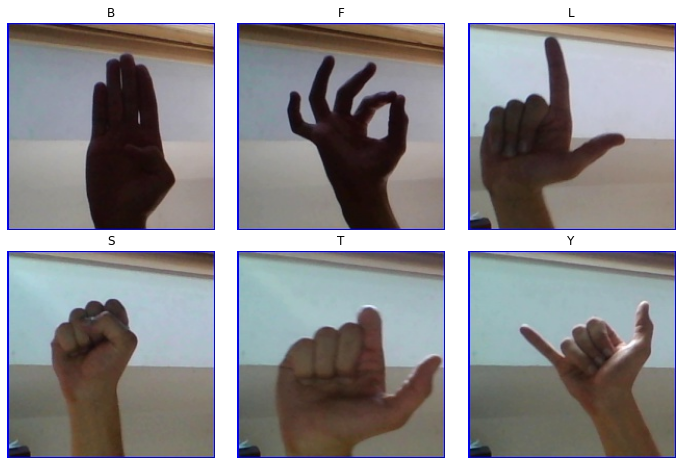

In [113]:
# Install necessary modules (uncomment if needed)
# !pip install mediapipe opencv-python-headless matplotlib

import cv2
import matplotlib.pyplot as plt

# Dictionary to store image names and paths
image_dict = {
    "B": "input_images/B.jpg",
    "F": "input_images/F.jpg",
    "L": "input_images/L.jpg",
    "S": "input_images/S.jpg",
    "T": "input_images/T.jpg",
    "Y": "input_images/Y.jpg"
    
}

# Load images and store them in a list
images = [(name, cv2.imread(path)) for name, path in image_dict.items()]

# Display images in a 2x3 grid with names on top
plt.figure(figsize=(12, 8))
for i, (name, img) in enumerate(images):
    plt.subplot(2, 3, i + 1)
    plt.title(name)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')


plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Decrease horizontal and vertical spacing

plt.show()


I0000 00:00:1730048423.231999  152447 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730048423.265996  319071 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.06), renderer: NVIDIA GeForce GTX 1060/PCIe/SSE2
W0000 00:00:1730048423.280164  319062 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730048423.293653  319068 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


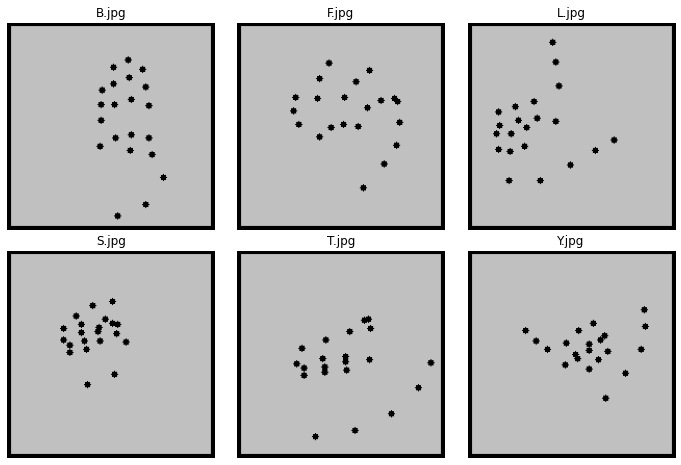

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# Initialize MediaPipe Hands for hand landmark detection
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

# Process each image to create isolated hand with gray background and black hand
isolated_images = []

# Convert each image and add isolation with black hand and gray background
for name, img in images:
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    # Create a mask and a grayscale background
    mask = np.zeros(img.shape[:2], dtype="uint8")
    gray_background = np.full(img.shape, 192, dtype=np.uint8)  # Light gray background

    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]

        # Draw landmarks as mask to isolate the hand
        for lm in hand_landmarks.landmark:
            x, y = int(lm.x * img.shape[1]), int(lm.y * img.shape[0])
            cv2.circle(mask, (x, y), 3, 255, -1)

        # Create an isolated hand filled with black
        isolated_hand_black = np.zeros_like(img)  # Black image
        isolated_hand_with_bg = cv2.bitwise_and(isolated_hand_black, isolated_hand_black, mask=mask)
        
        # Add the gray background
        background_with_hand = cv2.bitwise_and(gray_background, gray_background, mask=cv2.bitwise_not(mask))
        isolated_hand_with_bg = cv2.add(isolated_hand_with_bg, background_with_hand)

        # Add a black rectangular boundary around the isolated image
        border_thickness = 5  # Thickness of the border
        height, width = isolated_hand_with_bg.shape[:2]
        cv2.rectangle(isolated_hand_with_bg, (0, 0), (width - 1, height - 1), (0, 0, 0), border_thickness)
        
        isolated_images.append((name, isolated_hand_with_bg))
    else:
        print(f"No hand detected in {name}")
        isolated_images.append((name, None))

# Display isolated images with gray background and black hand in a 2x3 grid
plt.figure(figsize=(12, 8))
for i, (name, img) in enumerate(isolated_images):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{name}.jpg")
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.text(0.5, 0.5, "No Hand Detected", ha='center', va='center')
    plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Decrease horizontal and vertical spacing

plt.show()

# Close MediaPipe hands instance
hands.close()


I0000 00:00:1730046910.084600  152447 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1730046910.120287  301802 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.183.06), renderer: NVIDIA GeForce GTX 1060/PCIe/SSE2
W0000 00:00:1730046910.132512  301792 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730046910.145147  301796 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


No hand detected in A
No hand detected in C
No hand detected in D
No hand detected in E


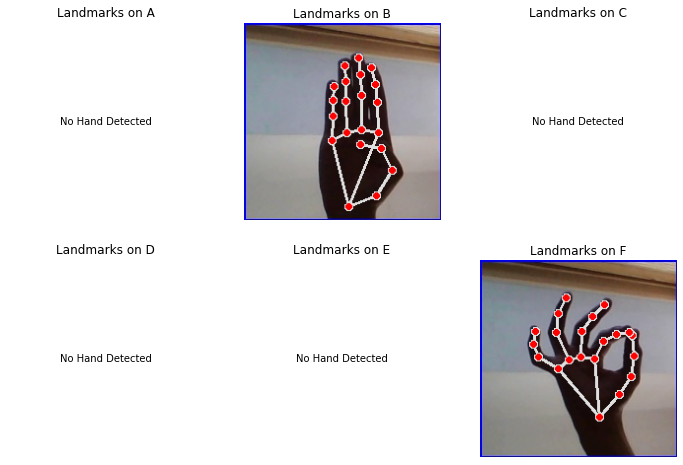

In [80]:
# Re-initialize MediaPipe Hands for landmark detection (if not closed)
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.8)

# Annotated images with landmarks
landmarked_images = []

# Process each image to draw landmarks
for name, img in images:
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    
    # Draw landmarks on the image if detected
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        annotated_img = img.copy()
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
        landmarked_images.append((name, annotated_img))
    else:
        print(f"No hand detected in {name}")
        landmarked_images.append((name, None))

# Display images with landmarks in a 2x3 grid
plt.figure(figsize=(12, 8))
for i, (name, img) in enumerate(landmarked_images):
    plt.subplot(2, 3, i + 1)
    plt.title(f"Landmarks on {name}")
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.text(0.5, 0.5, "No Hand Detected", ha='center', va='center')
    plt.axis('off')
plt.show()

# Close MediaPipe hands instance
hands.close()
